# Random Forest Classifier of Heartbeats

- Heartbeat Sounds Source: https://www.kaggle.com/kinguistics/heartbeat-sounds/data?select=set_a_timing.csv
- Script takes in .wav files, extracts features of sound files into tabular data
- Tabular data is used to train the random forest classifier
- Best Metrics:
- To Do: Include more Features in pre-processing

### Data Pre-processing

In [2]:
import numpy as np 
import pandas as pd 
import os,fnmatch
import scipy
import librosa
import IPython.display as ipd

In [3]:
def heart_df(set_files,col_names,d_list): #Creates tabular data of sound file features for each sound file
    output =[]
    count =0
    for folder in set_files:
        for d in d_list: #list of outcomes
            values= fnmatch.filter(os.listdir(folder),d)
            label= d.split("*")[0]
            
            for value in values: #calculating and appending sound file features from librosa
                x,sr=librosa.load(str(folder +'\\'+ value),duration=5,res_type='kaiser_fast')
                output.append([np.mean(x) for x in librosa.feature.mfcc(x,sr=sr)])
                output[count].append(sum(librosa.zero_crossings(x)))
                output[count].append(np.mean(librosa.feature.spectral_centroid(x)))
                output[count].append(np.mean(librosa.feature.spectral_rolloff(x,sr=sr)))
                output[count].append(np.mean(librosa.feature.chroma_stft(x,sr=sr)))
                output[count].append(label)
                output[count].append(value)
                count+=1
    return pd.DataFrame(output,columns=col_names)

In [4]:
music_folders=["set_a","set_b"]

col_names =["mfkk"+str(i) for i in range(20)]
for i in ["zero","centroid","rolloff","chroma","outcome","file"]:
    col_names.append(i)
    
outcomes=["normal*.wav","artifact*.wav","murmur*.wav"] 

feature_df= heart_df(music_folders,col_names,outcomes)

e:\bme2b\bme261\heart_class\heart\lib\site-packages\librosa\core\pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [5]:
print(feature_df.shape)
feature_df.head()

(520, 26)


,mfkk0,mfkk1,mfkk2,mfkk3,mfkk4,mfkk5,mfkk6,mfkk7,mfkk8,mfkk9,...,mfkk16,mfkk17,mfkk18,mfkk19,zero,centroid,rolloff,chroma,outcome,file
0,-504.037964,76.997124,-1.585262,34.563675,0.663375,23.808498,-3.102399,16.335907,-6.465252,11.320951,...,-9.759557,-1.204180,-8.794813,-2.499642,22856,2543.690892,5384.696452,0.671670,normal,normal__201101070538.wav
1,-369.186737,91.602287,8.740099,45.028103,21.458740,27.615288,17.346260,19.143579,14.277477,20.668922,...,6.130361,5.795323,4.890224,3.060663,1486,900.728824,2140.559896,0.750158,normal,normal__201101151127.wav
2,-379.535004,118.246223,8.529406,19.718822,-3.027937,20.717892,0.050543,13.745317,-3.446706,18.079884,...,-11.210546,5.854636,-9.596210,7.771472,10657,1927.470131,4725.541178,0.635878,normal,normal__201102081152.wav
3,-342.682220,133.837189,-11.243760,21.353346,-0.145609,29.179508,-5.019008,13.736671,-3.991349,15.423250,...,-1.418862,6.903131,-1.007653,1.195708,7681,1503.253101,3166.028849,0.637516,normal,normal__201102081321.wav
4,-549.604980,73.100746,-1.697143,28.962112,-0.544705,18.543928,-1.803224,15.123065,-6.083784,9.622066,...,-8.850921,-0.998493,-7.304602,-1.575300,25069,2680.044197,5603.118896,0.677684,normal,normal__201102201230.wav


In [6]:
feature_df["outcome"].value_counts()

normal      351
murmur      129
artifact     40
Name: outcome, dtype: int64

In [7]:
#Prepping data for training
X = feature_df.iloc[:,0:24]
X.head()

,mfkk0,mfkk1,mfkk2,mfkk3,mfkk4,mfkk5,mfkk6,mfkk7,mfkk8,mfkk9,...,mfkk14,mfkk15,mfkk16,mfkk17,mfkk18,mfkk19,zero,centroid,rolloff,chroma
0,-504.037964,76.997124,-1.585262,34.563675,0.663375,23.808498,-3.102399,16.335907,-6.465252,11.320951,...,-9.941511,0.288859,-9.759557,-1.204180,-8.794813,-2.499642,22856,2543.690892,5384.696452,0.671670
1,-369.186737,91.602287,8.740099,45.028103,21.458740,27.615288,17.346260,19.143579,14.277477,20.668922,...,10.951165,7.448577,6.130361,5.795323,4.890224,3.060663,1486,900.728824,2140.559896,0.750158
2,-379.535004,118.246223,8.529406,19.718822,-3.027937,20.717892,0.050543,13.745317,-3.446706,18.079884,...,-7.436246,7.344613,-11.210546,5.854636,-9.596210,7.771472,10657,1927.470131,4725.541178,0.635878
3,-342.682220,133.837189,-11.243760,21.353346,-0.145609,29.179508,-5.019008,13.736671,-3.991349,15.423250,...,0.412823,5.838560,-1.418862,6.903131,-1.007653,1.195708,7681,1503.253101,3166.028849,0.637516
4,-549.604980,73.100746,-1.697143,28.962112,-0.544705,18.543928,-1.803224,15.123065,-6.083784,9.622066,...,-10.037402,-0.315625,-8.850921,-0.998493,-7.304602,-1.575300,25069,2680.044197,5603.118896,0.677684


In [8]:
y=feature_df["outcome"]
y.head()

0    normal
1    normal
2    normal
3    normal
4    normal
Name: outcome, dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder().fit(y)
y=l.transform(y)

In [10]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=31)
print("X Train: ",len(X_train),"\n","X Test: ",len(X_test),sep="")

X Train: 390
X Test: 130


### Training Model

In [11]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(max_depth= 8,
 max_features= 5,
 min_samples_split=5,
 n_estimators=500, random_state=31).fit(X_train,y_train)
forest

RandomForestClassifier(max_depth=8, max_features=5, min_samples_split=5,
                       n_estimators=500, random_state=31)

### Results

In [27]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Heart Auscultation Classifications',
                          cmap=None,
                          normalize=False):
  
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

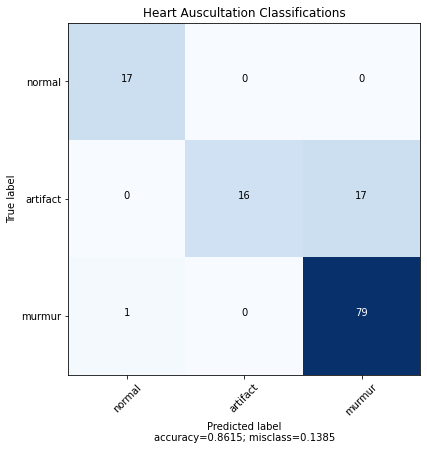

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
labels = feature_df["outcome"].unique()

plot_confusion_matrix(cm, labels)

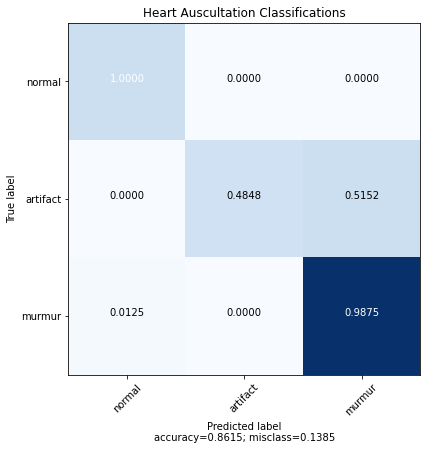

In [29]:
plot_confusion_matrix(cm, labels, normalize = True)